In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-plot
import scikitplot as skplt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.metrics import f1_score,fbeta_score,matthews_corrcoef, log_loss, confusion_matrix,classification_report,make_scorer,balanced_accuracy_score
from sklearn.metrics import accuracy_score, roc_curve, auc,recall_score,roc_auc_score, average_precision_score, precision_score,precision_recall_curve,ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV, learning_curve
from lightgbm import LGBMClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import (OneHotEncoder, PowerTransformer, StandardScaler)
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

In [2]:
from google.colab import files
uploaded = files.upload()

Saving predictive_maintenance.csv to predictive_maintenance.csv


In [69]:
df=pd.read_csv('predictive_maintenance.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [70]:
df['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [71]:
df.drop(['Product ID',"UDI","Target"], axis=1, inplace=True)

In [72]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.1,308.5,1498,49.4,5,No Failure
3,L,298.2,308.6,1433,39.5,7,No Failure
4,L,298.2,308.7,1408,40.0,9,No Failure
...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,No Failure
9996,H,298.9,308.4,1632,31.8,17,No Failure
9997,M,299.0,308.6,1645,33.4,22,No Failure
9998,H,299.0,308.7,1408,48.5,25,No Failure


<ipython-input-73-74c42938877b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True,cmap = "RdYlBu")


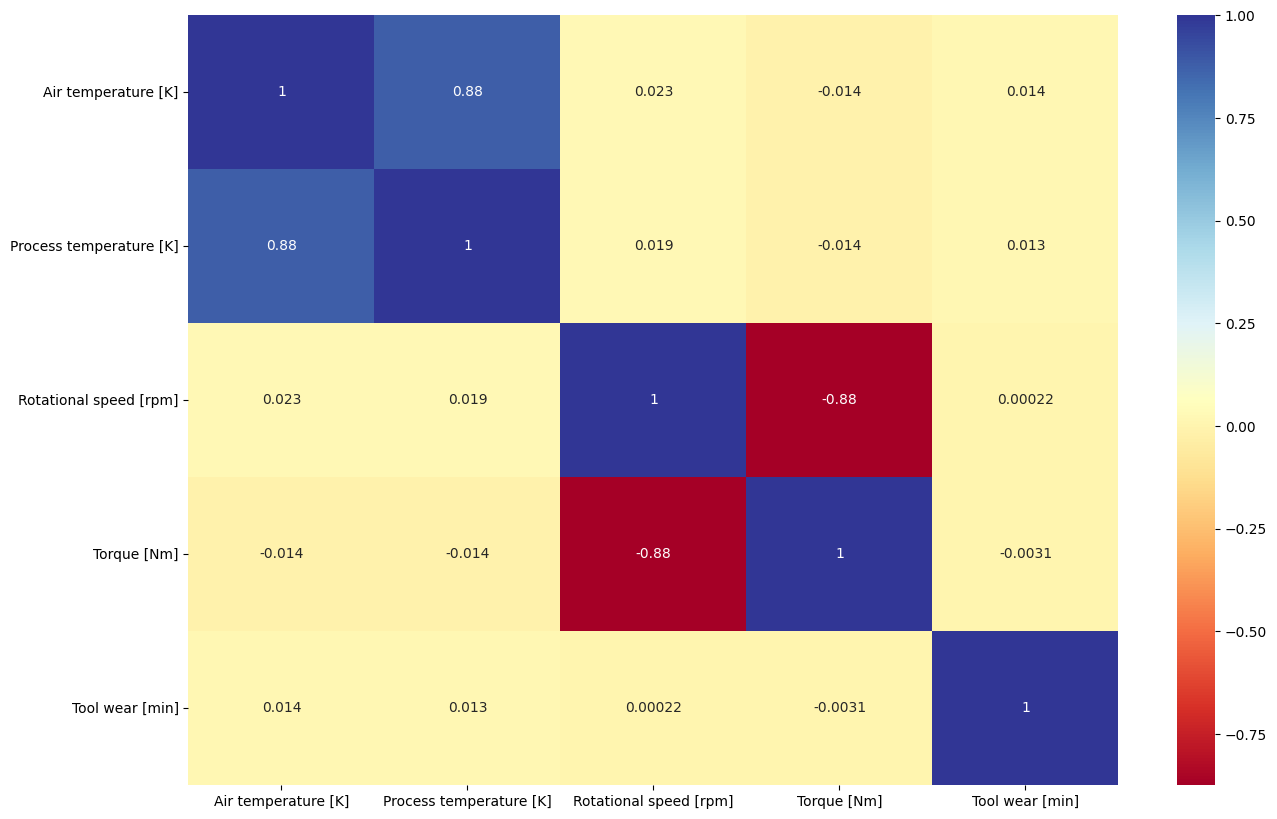

In [73]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot = True,cmap = "RdYlBu")
plt.draw()

In [74]:
df.isnull().values.any()

False

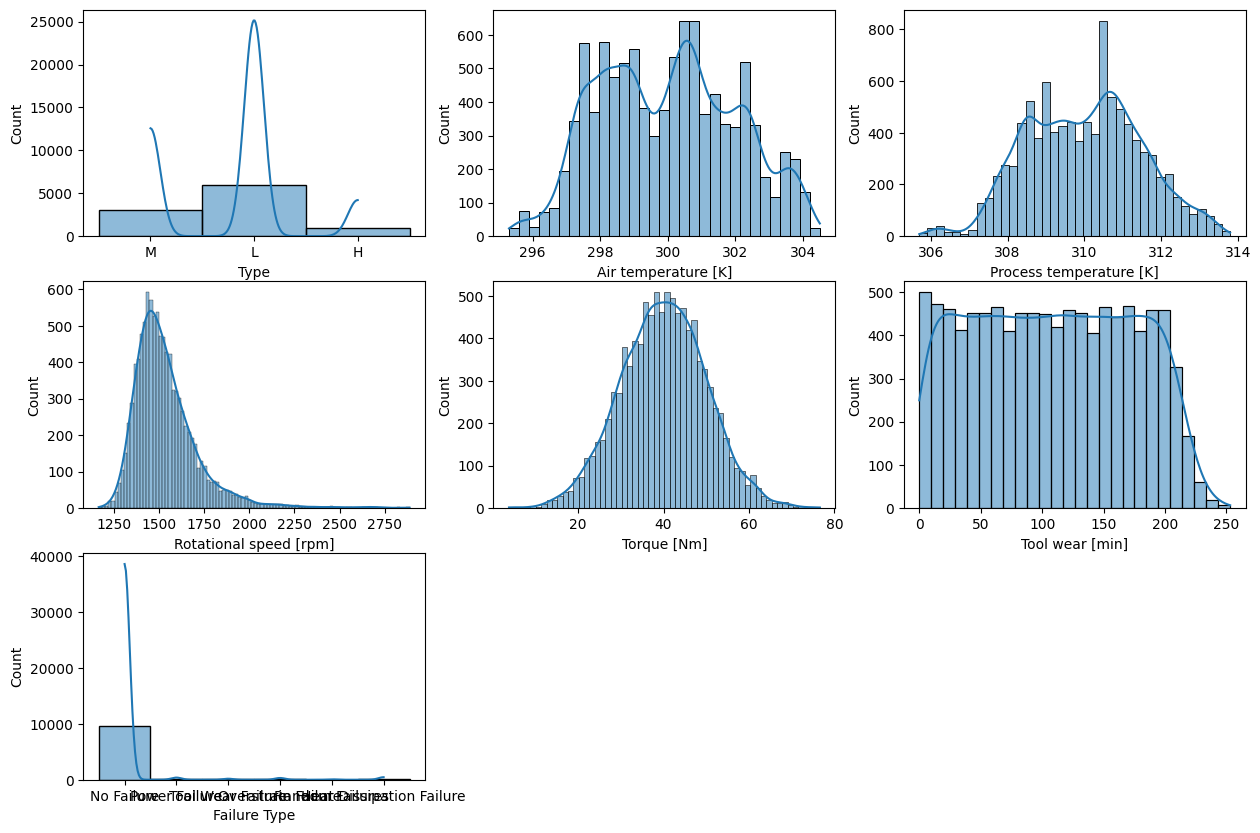

In [75]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(df[col],kde=True)

array([[<Axes: title={'center': 'Air temperature [K]'}>,
        <Axes: title={'center': 'Process temperature [K]'}>],
       [<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>],
       [<Axes: title={'center': 'Tool wear [min]'}>, <Axes: >]],
      dtype=object)

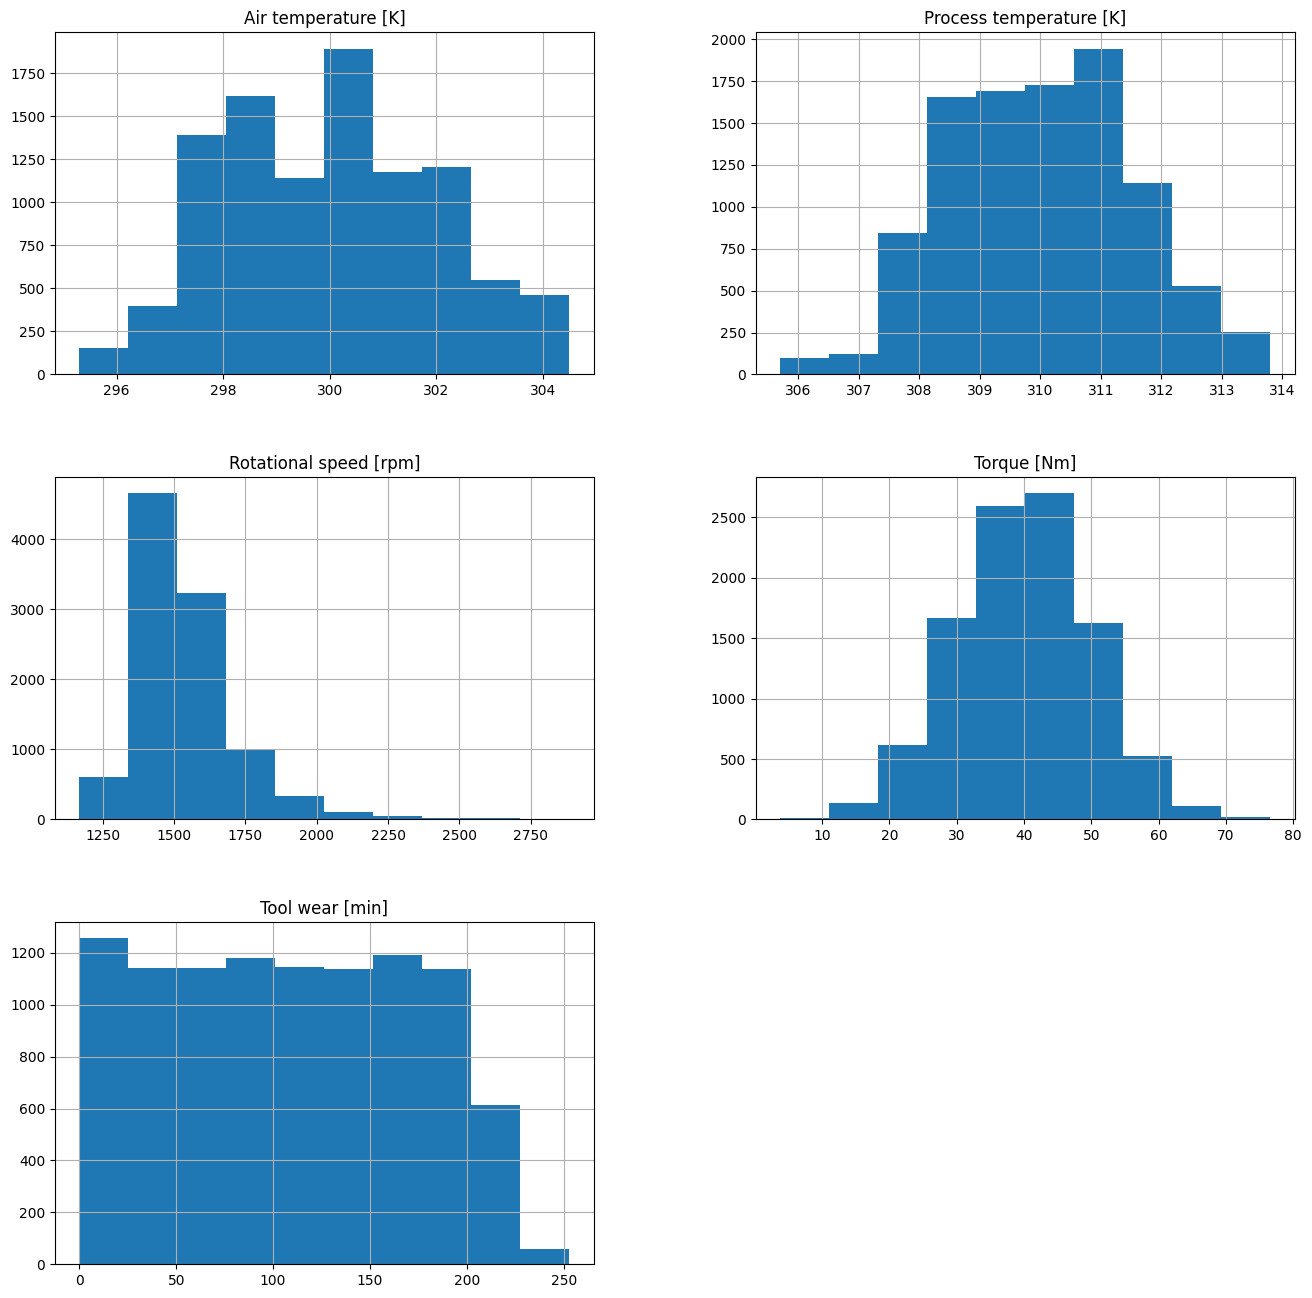

In [76]:
df.hist(figsize=(16, 16))

In [77]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2.000259,1.483734,179.284096,9.968934,63.654147
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000


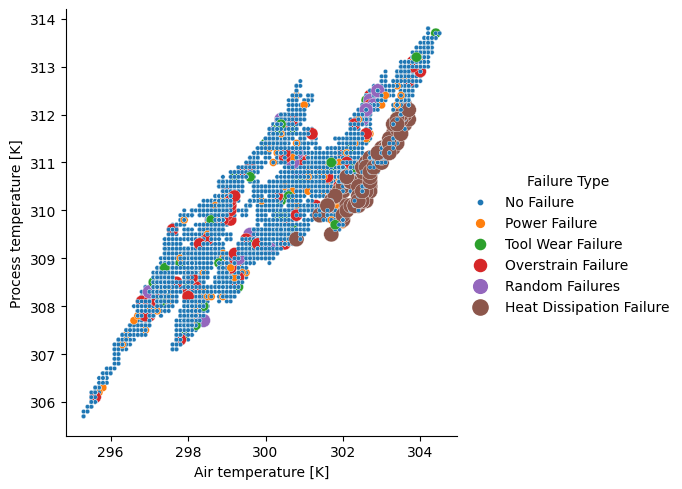

In [78]:
_ = sns.relplot(x="Air temperature [K]", y="Process temperature [K]", hue="Failure Type",size="Failure Type", sizes=(120, 10),data=df)

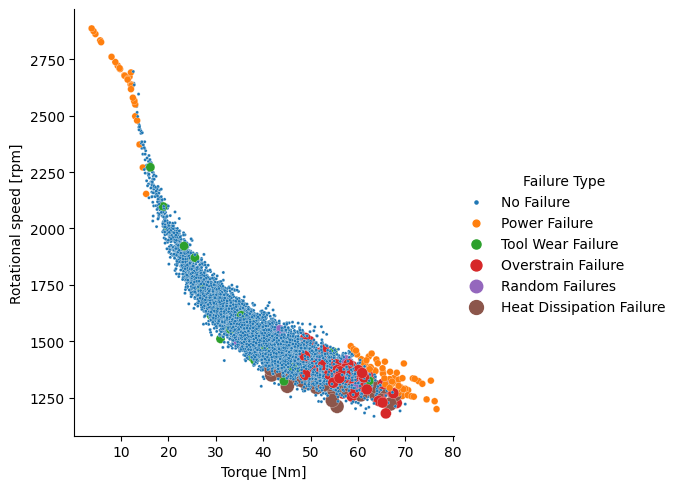

In [79]:
_ = sns.relplot(x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",size="Failure Type", sizes=(100, 5),data=df)

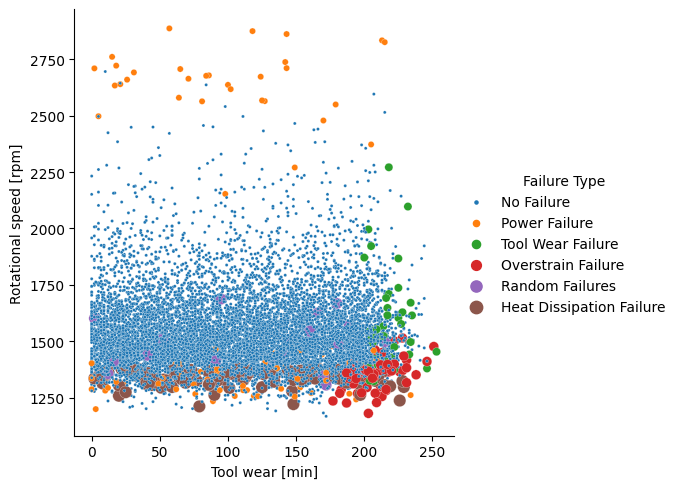

In [80]:
_ = sns.relplot(x="Tool wear [min]",
                y="Rotational speed [rpm]",
                hue="Failure Type",
                size="Failure Type",
                sizes=(80, 5),
                data=df)

In [81]:
df["Failure Type"].replace({"No Failure": 0,"Heat Dissipation Failure": 1,"Power Failure": 2,"Overstrain Failure": 3,"Tool Wear Failure": 4,"Random Failures": 5},inplace=True)

In [82]:
col_name=df.columns.to_list()

In [89]:
predictive_columns = col_name[0:6]
X = df[predictive_columns]
y = df["Failure Type"]
X["Type"].replace({"H":0,"L":1,"M":2}, inplace=True)
X.head()

<ipython-input-89-cd474e67d904>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Type"].replace({"H":0,"L":1,"M":2}, inplace=True)


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,2,298.1,308.6,1551,42.8,0
1,1,298.2,308.7,1408,46.3,3
2,1,298.1,308.5,1498,49.4,5
3,1,298.2,308.6,1433,39.5,7
4,1,298.2,308.7,1408,40.0,9


In [90]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5, random_state=None)
for train_index,test_index in skf.split(X,y):
    x1_train,x1_test=X.iloc[train_index],X.iloc[test_index]
    y1_train,y1_test=y.iloc[train_index],y.iloc[test_index]
    train_0, train_1 = len(y1_train[y1_train==0]), len(y1_train[y1_train==1])
    test_0, test_1 = len(y1_test[y1_test==0]), len(y1_test[y1_test==1])
    print('train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

train: 0=7721, 1=90, Test: 0=1931, 1=22
train: 0=7721, 1=90, Test: 0=1931, 1=22
train: 0=7722, 1=90, Test: 0=1930, 1=22
train: 0=7722, 1=89, Test: 0=1930, 1=23
train: 0=7722, 1=89, Test: 0=1930, 1=23


In [93]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=40, test_size=0.33, stratify=y)

In [94]:
from imblearn.combine import SMOTETomek
smote = SMOTETomek(random_state=42)
X1_res, y1_res = smote.fit_resample(X_train,y_train)

In [95]:
X1_res.shape

(38748, 6)

In [96]:
X1_res

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,1,297.500000,308.700000,1371,46.500000,121
1,2,297.400000,308.600000,1452,41.200000,197
2,2,296.400000,307.300000,2077,19.100000,80
3,1,300.400000,309.300000,1413,50.300000,101
4,1,297.400000,308.100000,1348,57.400000,66
...,...,...,...,...,...,...
38743,1,302.567982,312.035964,1437,42.908492,201
38744,1,302.766184,312.183092,1507,36.246384,79
38745,1,299.733107,309.612309,1567,35.541596,183
38746,1,302.463023,311.872267,1308,59.649157,168


In [97]:
y1_res.shape
y1_res.tail()

38743    5
38744    5
38745    5
38746    5
38747    5
Name: Failure Type, dtype: int64

In [98]:
df_x = pd.DataFrame(X1_res)

In [99]:
df_x["Type"].replace({0:"H",1:"L",2:"M"}, inplace=True)

In [100]:
df_y = pd.DataFrame(y1_res)
df_y

,Failure Type
0,0
1,0
2,0
3,0
4,0
...,...
38743,5
38744,5
38745,5
38746,5


In [101]:
df_y["Failure Type"].replace({0:"No Failure",1:"Heat Dissipation Failure",2:"Power Failure",3:"Overstrain Failure",4:"Tool Wear Failure",5:"Random Failures"},inplace=True)

In [102]:
df1 = pd.concat([df_x,df_y],axis=1)

In [103]:
df1["Failure Type"].value_counts()

Overstrain Failure          6467
Heat Dissipation Failure    6464
Power Failure               6462
Tool Wear Failure           6461
Random Failures             6454
No Failure                  6440
Name: Failure Type, dtype: int64

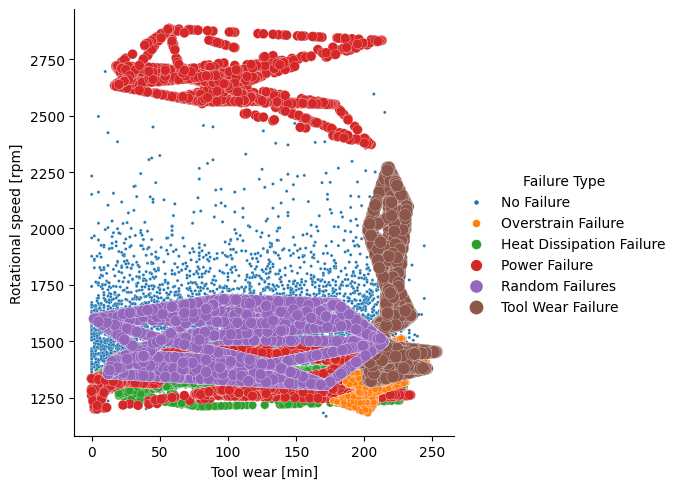

In [104]:
_ = sns.relplot(x="Tool wear [min]",
                y="Rotational speed [rpm]",
                hue="Failure Type",
                size="Failure Type",
                sizes=(80, 5),
                data=df1)

In [105]:
X_test.shape

(3300, 6)

In [106]:
y_test.shape

(3300,)

In [107]:
# Build categorical preprocessor
categorical_cols = X.select_dtypes(include="object").columns.to_list()
categorical_pipe = make_pipeline(OneHotEncoder(sparse=False, handle_unknown="ignore"))

# Build numeric processor
to_log = ["Rotational speed [rpm]",	"Tool wear [min]"]
to_scale = ["Air temperature [K]","Process temperature [K]", "Torque [Nm]"]
numeric_pipe_1 = make_pipeline(PowerTransformer())
numeric_pipe_2 = make_pipeline(StandardScaler())

# Full processor
full = ColumnTransformer(
    transformers=[
        ("categorical", categorical_pipe, categorical_cols),
        ("power_transform", numeric_pipe_1, to_log),
        ("standardization", numeric_pipe_2, to_scale)])

In [108]:
rfc = OutputCodeClassifier(RandomForestClassifier(), code_size=6, random_state=40)

In [109]:
# Final pipeline combined with RandomForest
pipeline = Pipeline(
    steps=[("preprocess", full),("base",rfc)])

In [110]:
model_rfc = pipeline.fit(X1_res, y1_res)
y_pred_rfc = model_rfc.predict(X_test)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3185
           1       0.39      0.62      0.48        37
           2       0.47      0.61      0.54        31
           3       0.67      0.77      0.71        26
           4       0.05      0.20      0.08        15
           5       0.00      0.00      0.00         6

    accuracy                           0.94      3300
   macro avg       0.43      0.53      0.46      3300
weighted avg       0.97      0.94      0.95      3300



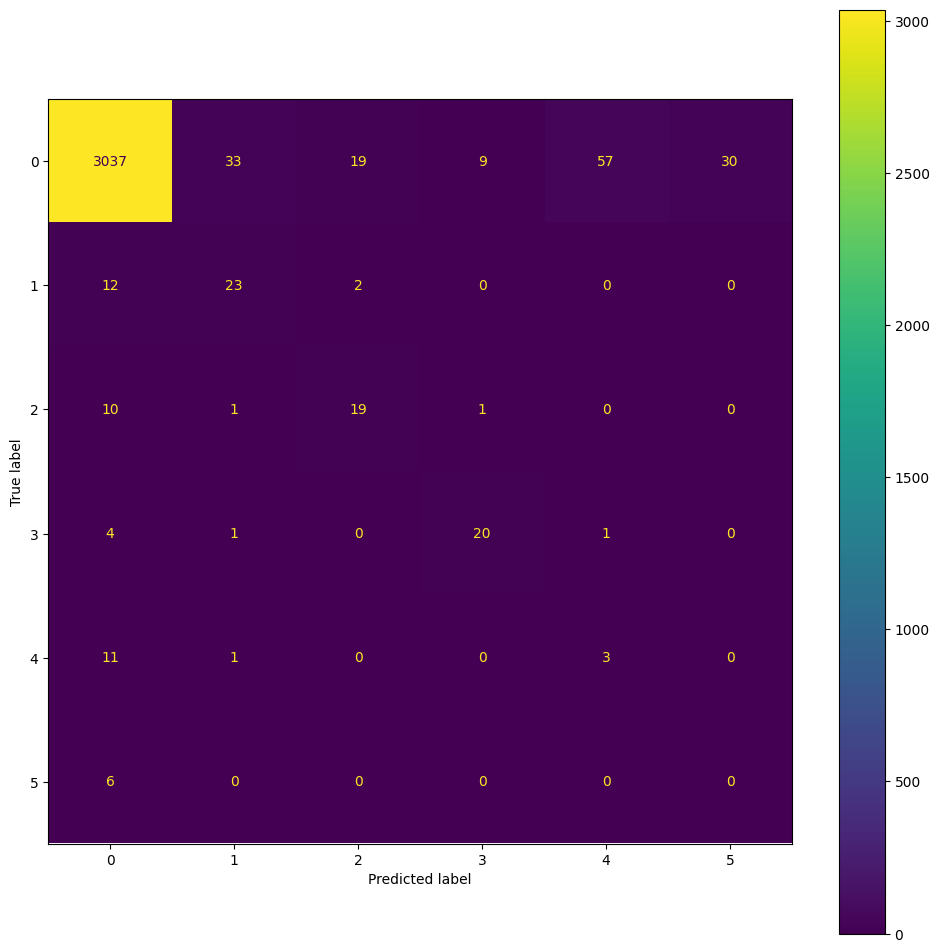

In [111]:
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 12))
print(classification_report(y_test, y_pred_rfc))
# Create the matrix
cm = confusion_matrix(y_test, y_pred_rfc)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
cmp.plot(ax=ax)
plt.show();

In [112]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3185
           1       0.39      0.62      0.48        37
           2       0.47      0.61      0.54        31
           3       0.67      0.77      0.71        26
           4       0.05      0.20      0.08        15
           5       0.00      0.00      0.00         6

    accuracy                           0.94      3300
   macro avg       0.43      0.53      0.46      3300
weighted avg       0.97      0.94      0.95      3300



In [113]:
print("Accuracy Score: %.4f" %(accuracy_score(y_test,y_pred_rfc)))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test,y_pred_rfc)))

Accuracy Score: 0.9400
Matthews correlation coefficient: 0.4145


In [114]:
lgbm = OutputCodeClassifier(LGBMClassifier(), code_size=6, random_state=42)

In [115]:
# Final pipeline combined with RandomForest
pipeline_lgbm = Pipeline(
    steps=[
        ("preprocess", full),
        ("base",lgbm,),])

In [116]:
model_lgbm = pipeline_lgbm.fit(X1_res, y1_res)
y_pred_lgbm = model_lgbm.predict(X_test)

[LightGBM] [Info] Number of positive: 12902, number of negative: 25846
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001965 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1085
[LightGBM] [Info] Number of data points in the train set: 38748, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.332972 -> initscore=-0.694774
[LightGBM] [Info] Start training from score -0.694774
[LightGBM] [Info] Number of positive: 32281, number of negative: 6467
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001916 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1085
[LightGBM] [Info] Number of data points in the train set: 38748, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.833101 -> initscore=1.607766
[LightGBM] [Info] Start training from score 1.607766
[LightGBM] 

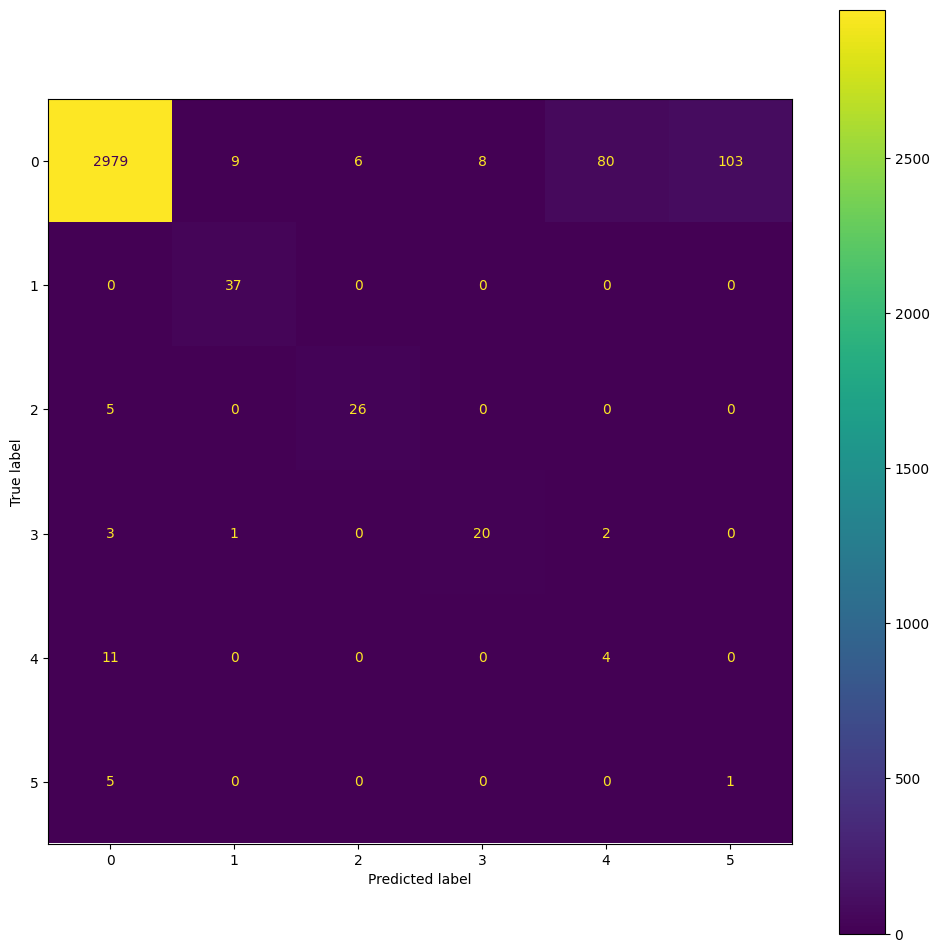

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      3185
           1       0.79      1.00      0.88        37
           2       0.81      0.84      0.83        31
           3       0.71      0.77      0.74        26
           4       0.05      0.27      0.08        15
           5       0.01      0.17      0.02         6

    accuracy                           0.93      3300
   macro avg       0.56      0.66      0.58      3300
weighted avg       0.98      0.93      0.95      3300



In [117]:
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 12))
# Create the matrix
cm = confusion_matrix(y_test, y_pred_lgbm)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
cmp.plot(ax=ax)
plt.show();
print(classification_report(y_test, y_pred_lgbm))

In [118]:
print("Accuracy Score: %.4f" %(accuracy_score(y_test,y_pred_lgbm)))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test,y_pred_lgbm)))

Accuracy Score: 0.9294
Matthews correlation coefficient: 0.4703


In [119]:
from xgboost import XGBClassifier

In [120]:
xgb = OutputCodeClassifier(XGBClassifier(), code_size=6, random_state=42)

In [121]:
# Final pipeline combined with RandomForest
pipeline_xgb = Pipeline(
    steps=[("preprocess", full),("base",xgb)])

In [122]:
model_xgb = pipeline_xgb.fit(X1_res, y1_res)
y_pred_xgb = model_xgb.predict(X_test)

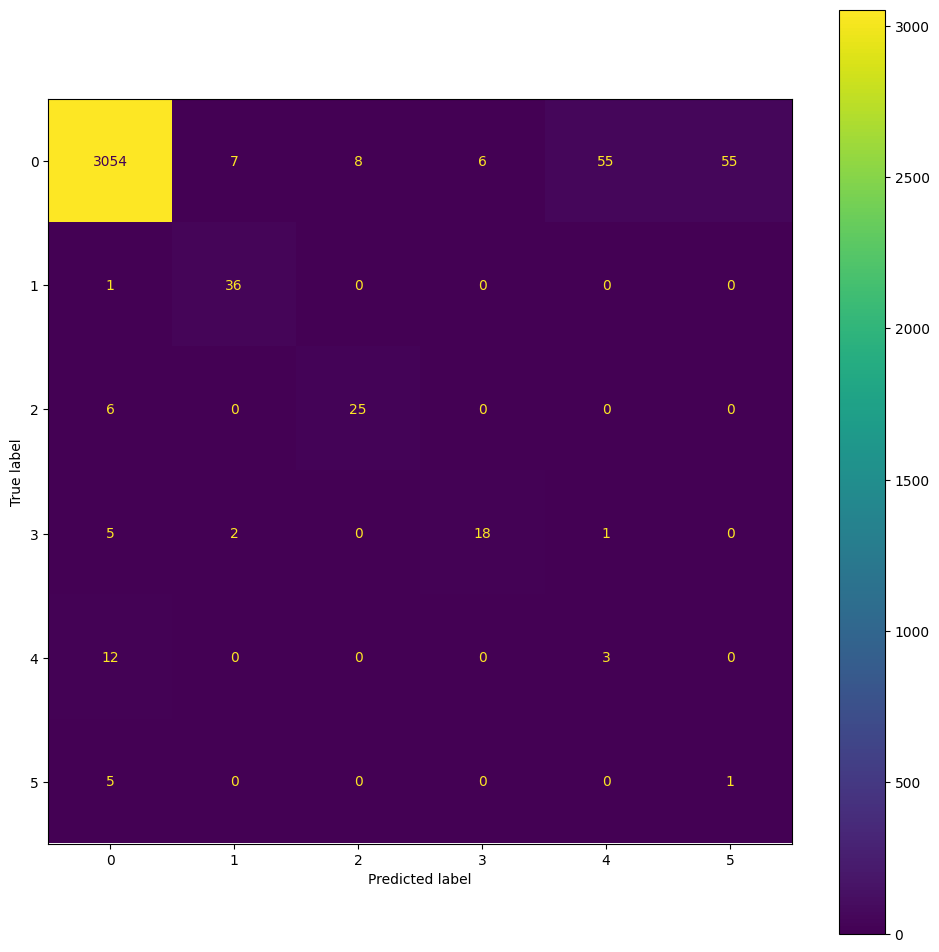

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3185
           1       0.80      0.97      0.88        37
           2       0.76      0.81      0.78        31
           3       0.75      0.69      0.72        26
           4       0.05      0.20      0.08        15
           5       0.02      0.17      0.03         6

    accuracy                           0.95      3300
   macro avg       0.56      0.63      0.58      3300
weighted avg       0.98      0.95      0.96      3300



In [123]:
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 12))
# Create the matrix
cm = confusion_matrix(y_test, y_pred_xgb)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
cmp.plot(ax=ax)
plt.show();
print(classification_report(y_test, y_pred_xgb))

In [124]:
print("Accuracy Score: %.4f" %(accuracy_score(y_test,y_pred_lgbm)))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test,y_pred_lgbm)))

Accuracy Score: 0.9294
Matthews correlation coefficient: 0.4703


In [125]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.1 MB/s eta 0:00:00


In [126]:
from catboost import CatBoostClassifier, Pool, cv

In [127]:
catb = OutputCodeClassifier(CatBoostClassifier(random_seed=42,logging_level='Silent'), code_size=6, random_state=42)

In [128]:
pipeline_catb = Pipeline(steps=[("preprocess", full),("base",catb)])

In [131]:
X1_res.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,L,297.5,308.7,1371,46.5,121
1,M,297.4,308.6,1452,41.2,197
2,M,296.4,307.3,2077,19.1,80
3,L,300.4,309.3,1413,50.3,101
4,L,297.4,308.1,1348,57.4,66


In [134]:
X1_res["Type"].replace({"H":0,"L":1,"M":2}, inplace=True)

In [135]:
X1_res.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,1,297.5,308.7,1371,46.5,121
1,2,297.4,308.6,1452,41.2,197
2,2,296.4,307.3,2077,19.1,80
3,1,300.4,309.3,1413,50.3,101
4,1,297.4,308.1,1348,57.4,66


In [133]:
y1_res.head()

0    0
1    0
2    0
3    0
4    0
Name: Failure Type, dtype: int64

In [136]:
model_catb = catb.fit(X1_res, y1_res)
y_pred_catb = model_catb.predict(X_test)

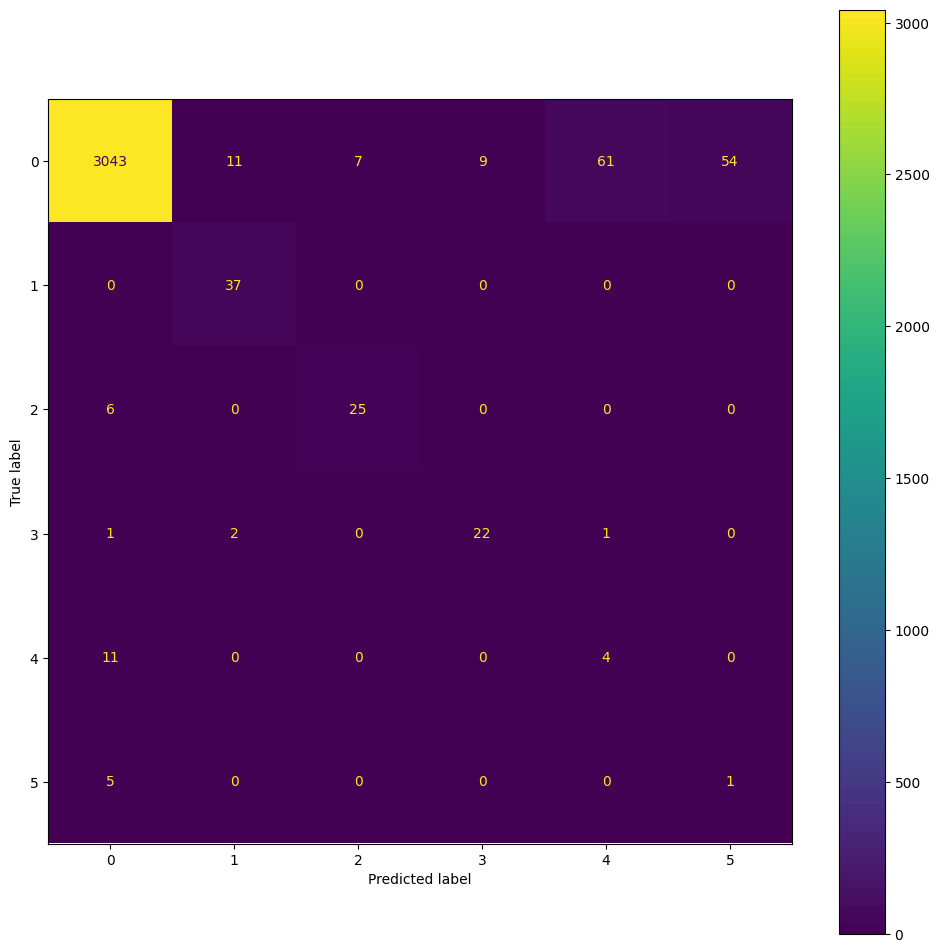

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3185
           1       0.74      1.00      0.85        37
           2       0.78      0.81      0.79        31
           3       0.71      0.85      0.77        26
           4       0.06      0.27      0.10        15
           5       0.02      0.17      0.03         6

    accuracy                           0.95      3300
   macro avg       0.55      0.67      0.59      3300
weighted avg       0.98      0.95      0.96      3300



In [137]:
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 12))
# Create the matrix
cm = confusion_matrix(y_test, y_pred_catb)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
cmp.plot(ax=ax)
plt.show();
print(classification_report(y_test, y_pred_catb))

In [138]:
print("Accuracy Score: %.4f" %(accuracy_score(y_test,y_pred_catb)))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test,y_pred_catb)))

Accuracy Score: 0.9491
Matthews correlation coefficient: 0.5398


In [139]:
catb_ov = CatBoostClassifier()
ovr = OneVsRestClassifier(catb_ov)

In [140]:
ovr.fit(X1_res, y1_res)
yhat_ovr = ovr.predict(X_test)

Streaming output truncated to the last 5000 lines.
4:	learn: 0.2210905	total: 53.7ms	remaining: 10.7s
5:	learn: 0.1840368	total: 63.8ms	remaining: 10.6s
6:	learn: 0.1574731	total: 82ms	remaining: 11.6s
7:	learn: 0.1353470	total: 91ms	remaining: 11.3s
8:	learn: 0.1185085	total: 99.6ms	remaining: 11s
9:	learn: 0.1041082	total: 108ms	remaining: 10.7s
10:	learn: 0.0912779	total: 117ms	remaining: 10.5s
11:	learn: 0.0815311	total: 126ms	remaining: 10.3s
12:	learn: 0.0733800	total: 134ms	remaining: 10.2s
13:	learn: 0.0649920	total: 143ms	remaining: 10.1s
14:	learn: 0.0589393	total: 151ms	remaining: 9.95s
15:	learn: 0.0532690	total: 160ms	remaining: 9.84s
16:	learn: 0.0490216	total: 169ms	remaining: 9.74s
17:	learn: 0.0448294	total: 177ms	remaining: 9.66s
18:	learn: 0.0416996	total: 185ms	remaining: 9.57s
19:	learn: 0.0385705	total: 194ms	remaining: 9.5s
20:	learn: 0.0358407	total: 202ms	remaining: 9.43s
21:	learn: 0.0332449	total: 211ms	remaining: 9.36s
22:	learn: 0.0312040	total: 219ms	remai

In [141]:
# Final pipeline combined with RandomForest
pipeline = Pipeline(
    steps=[("preprocess", full),("base",ovr)])

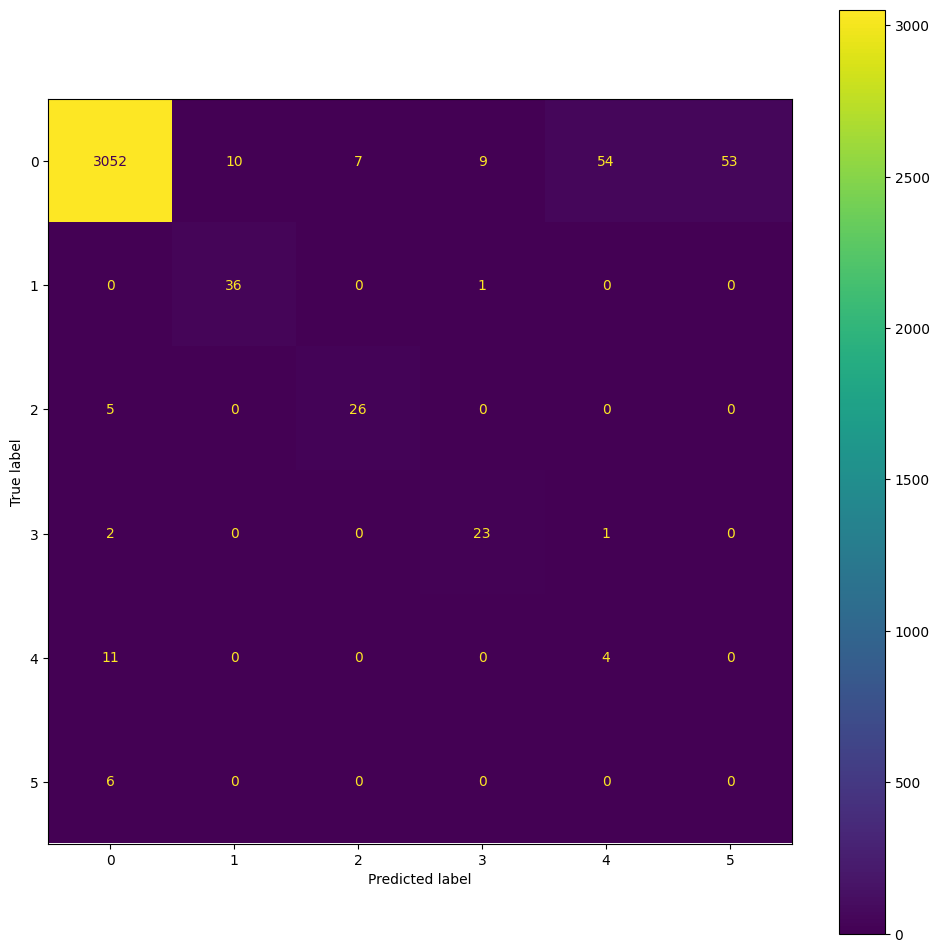

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3185
           1       0.78      0.97      0.87        37
           2       0.79      0.84      0.81        31
           3       0.70      0.88      0.78        26
           4       0.07      0.27      0.11        15
           5       0.00      0.00      0.00         6

    accuracy                           0.95      3300
   macro avg       0.55      0.65      0.59      3300
weighted avg       0.98      0.95      0.96      3300



In [142]:
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 12))
# Create the matrix
cm = confusion_matrix(y_test, yhat_ovr)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
cmp.plot(ax=ax)
plt.show();
print(classification_report(y_test, yhat_ovr))

In [143]:
print("Balanced Accuracy Score: %.4f" %(balanced_accuracy_score(y_test, yhat_ovr)))
print("Accuracy Score: %.4f" %(accuracy_score(y_test, yhat_ovr)))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test, yhat_ovr)))

Balanced Accuracy Score: 0.6535
Accuracy Score: 0.9518
Matthews correlation coefficient: 0.5492


In [144]:
catb_ovo = CatBoostClassifier()
ovo = OneVsOneClassifier(catb_ovo)

In [145]:
ovo.fit(X1_res, y1_res)
yhat_ovo = ovo.predict(X_test)

Streaming output truncated to the last 5000 lines.
4:	learn: 0.3270601	total: 23.7ms	remaining: 4.71s
5:	learn: 0.2765674	total: 28.2ms	remaining: 4.67s
6:	learn: 0.2406381	total: 32.9ms	remaining: 4.67s
7:	learn: 0.2081041	total: 37ms	remaining: 4.58s
8:	learn: 0.1791241	total: 41.6ms	remaining: 4.58s
9:	learn: 0.1528400	total: 46ms	remaining: 4.55s
10:	learn: 0.1330005	total: 50.5ms	remaining: 4.54s
11:	learn: 0.1154093	total: 54.7ms	remaining: 4.5s
12:	learn: 0.1009903	total: 59.3ms	remaining: 4.5s
13:	learn: 0.0885620	total: 63.9ms	remaining: 4.5s
14:	learn: 0.0766241	total: 68.5ms	remaining: 4.5s
15:	learn: 0.0664099	total: 72.9ms	remaining: 4.48s
16:	learn: 0.0570802	total: 77.3ms	remaining: 4.47s
17:	learn: 0.0507563	total: 82.4ms	remaining: 4.49s
18:	learn: 0.0451428	total: 88.5ms	remaining: 4.57s
19:	learn: 0.0395491	total: 95ms	remaining: 4.66s
20:	learn: 0.0351252	total: 105ms	remaining: 4.89s
21:	learn: 0.0312567	total: 109ms	remaining: 4.85s
22:	learn: 0.0274960	total: 113

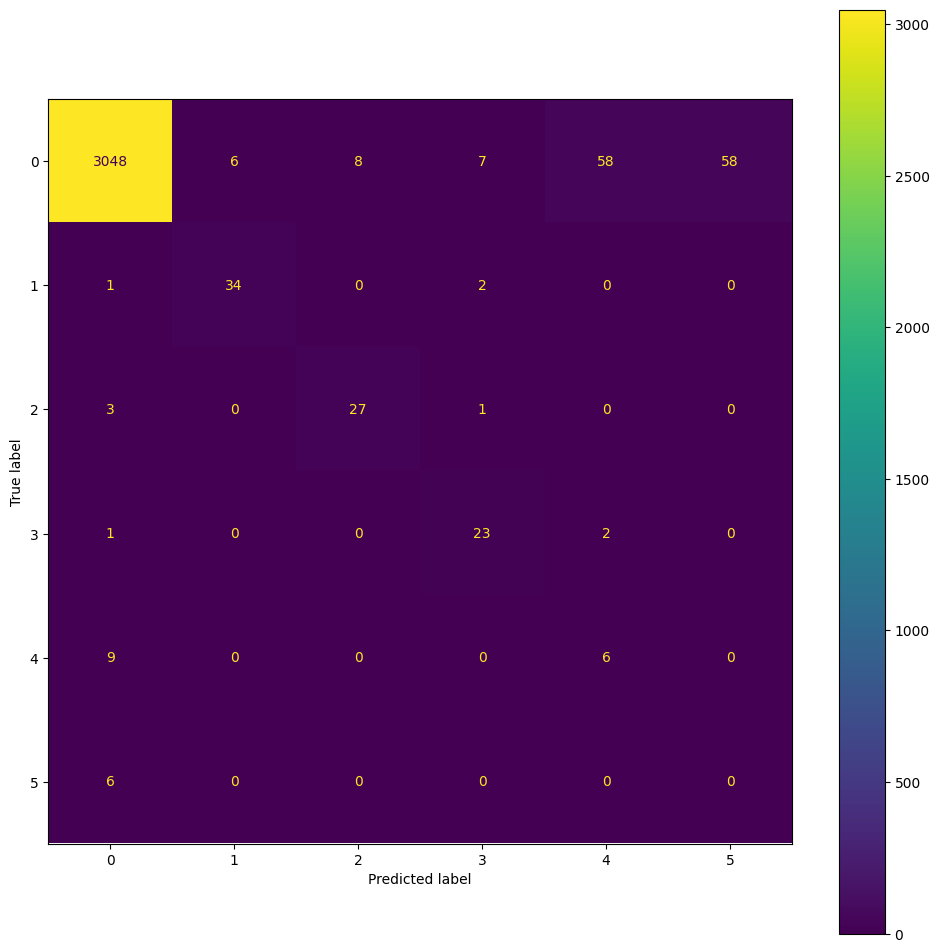

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3185
           1       0.85      0.92      0.88        37
           2       0.77      0.87      0.82        31
           3       0.70      0.88      0.78        26
           4       0.09      0.40      0.15        15
           5       0.00      0.00      0.00         6

    accuracy                           0.95      3300
   macro avg       0.57      0.67      0.60      3300
weighted avg       0.98      0.95      0.97      3300



In [146]:
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 12))
# Create the matrix
cm = confusion_matrix(y_test, yhat_ovo)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
cmp.plot(ax=ax)
plt.show();
print(classification_report(y_test, yhat_ovo))

In [147]:
print("Balanced Accuracy Score: %.4f" %(balanced_accuracy_score(y_test, yhat_ovo)))
print("Accuracy Score: %.4f" %(accuracy_score(y_test, yhat_ovo)))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test, yhat_ovo)))

Balanced Accuracy Score: 0.6719
Accuracy Score: 0.9509
Matthews correlation coefficient: 0.5551


In [148]:
rfc_ov = RandomForestClassifier()

In [ ]:
ovr = OneVsRestClassifier(rfc_ov)
ovr.fit(X1_res, y1_res)

OneVsRestClassifier(estimator=RandomForestClassifier())

In [ ]:
yhat_ovr = ovr.predict(X_test)

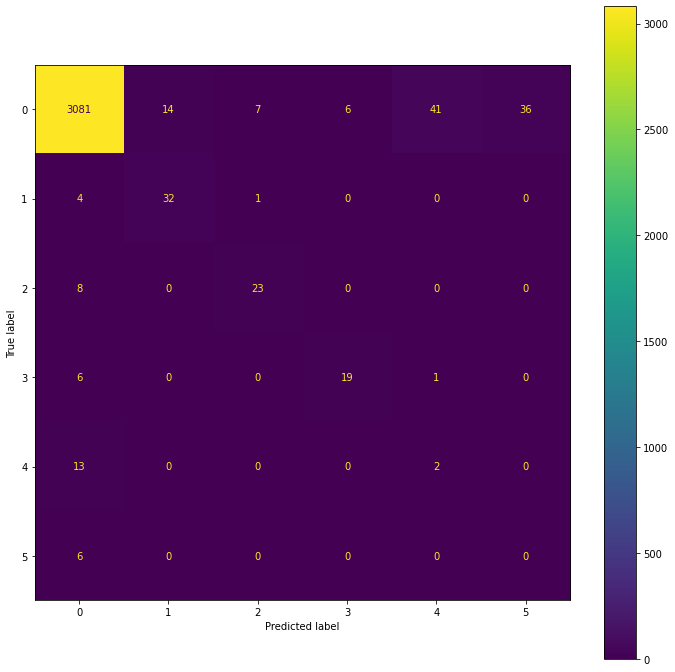

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3185
           1       0.70      0.86      0.77        37
           2       0.74      0.74      0.74        31
           3       0.76      0.73      0.75        26
           4       0.05      0.13      0.07        15
           5       0.00      0.00      0.00         6

    accuracy                           0.96      3300
   macro avg       0.54      0.57      0.55      3300
weighted avg       0.97      0.96      0.97      3300



In [ ]:
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 12))
# Create the matrix
cm = confusion_matrix(y_test, yhat_ovr)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
cmp.plot(ax=ax)
plt.show();
print(classification_report(y_test, yhat_ovr))

In [ ]:
print("Balanced Accuracy Score: %.4f" %(balanced_accuracy_score(y_test, yhat_ovr)))
print("Accuracy Score: %.4f" %(accuracy_score(y_test, yhat_ovr)))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test, yhat_ovr)))

Balanced Accuracy Score: 0.5730
Accuracy Score: 0.9567
Matthews correlation coefficient: 0.5203


In [ ]:
ovo = OneVsOneClassifier(rfc_ov)

In [ ]:
ovo.fit(X1_res, y1_res)
yhat_ovo = ovo.predict(X_test)

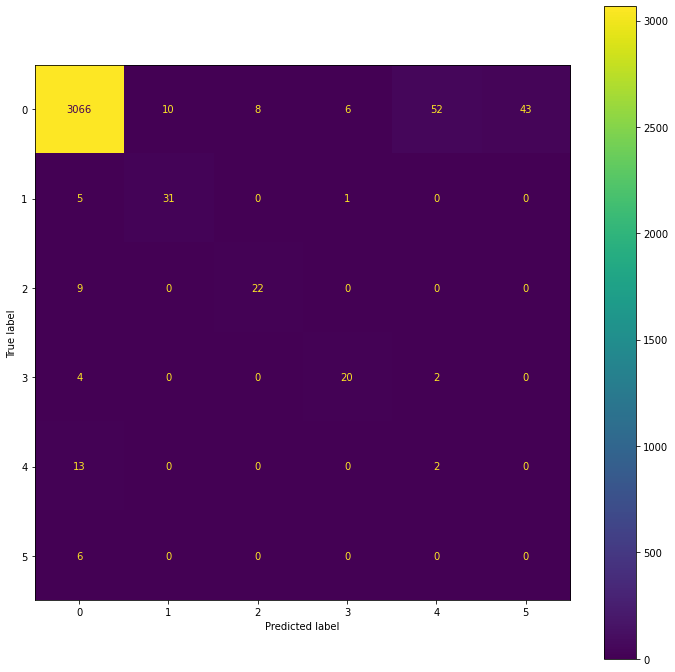

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      3185
           1       0.76      0.84      0.79        37
           2       0.73      0.71      0.72        31
           3       0.74      0.77      0.75        26
           4       0.04      0.13      0.06        15
           5       0.00      0.00      0.00         6

    accuracy                           0.95      3300
   macro avg       0.54      0.57      0.55      3300
weighted avg       0.98      0.95      0.96      3300



In [ ]:
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 12))
# Create the matrix
cm = confusion_matrix(y_test, yhat_ovo)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
cmp.plot(ax=ax)
plt.show();
print(classification_report(y_test, yhat_ovo))

In [ ]:
print("Balanced Accuracy Score: %.4f" %(balanced_accuracy_score(y_test, yhat_ovo)))
print("Accuracy Score: %.4f" %(accuracy_score(y_test, yhat_ovo)))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test, yhat_ovo)))

Balanced Accuracy Score: 0.5688
Accuracy Score: 0.9518
Matthews correlation coefficient: 0.4955
